In [1]:
# from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Q 2.1 Load Task2B train.csv and Task2B test.csv and plotting

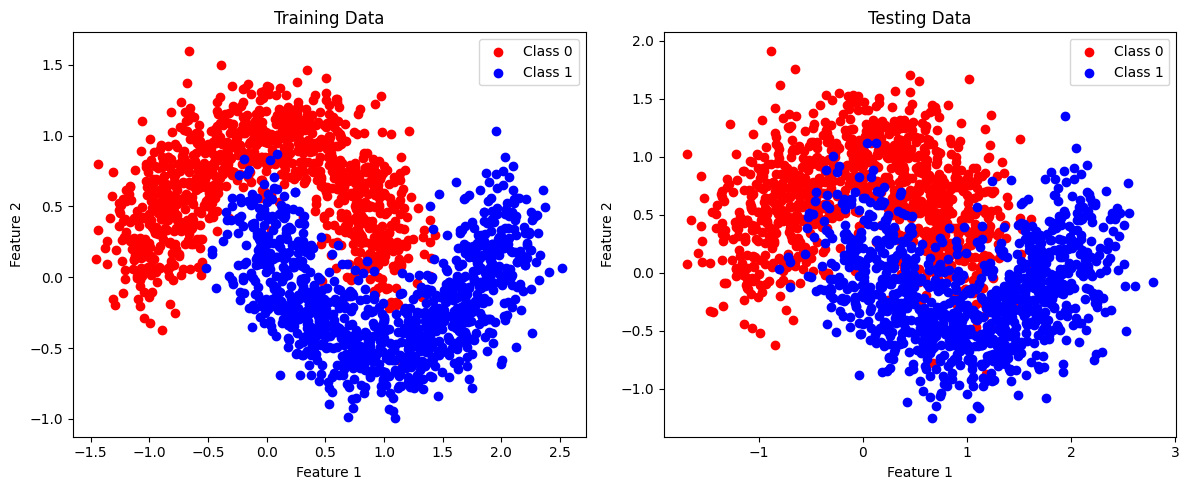

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the datasets
train_data = pd.read_csv("/content/Task2B_train.csv")
test_data = pd.read_csv("/content/Task2B_test.csv")

# Step 2: Separate features and labels for both train and test datasets
X_train = train_data.iloc[:, :-1].values  # All columns except the last
y_train = train_data.iloc[:, -1].values   # Last column as labels

X_test = test_data.iloc[:, :-1].values  # All columns except the last
y_test = test_data.iloc[:, -1].values   # Last column as labels

# Step 3: Plot the training data
plt.figure(figsize=(12, 5))

# Plot for training data
plt.subplot(1, 2, 1)
plt.title("Training Data")
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label="Class 0")
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label="Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Plot for testing data
plt.subplot(1, 2, 2)
plt.title("Testing Data")
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label="Class 0")
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label="Class 1")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.tight_layout()
plt.show()


## Q 2.2 Perceptron models

Test Error with learning rate 0.1: 0.15400000000000003
Test Error with learning rate 1.0: 0.21499999999999997
Best learning rate: 0.1


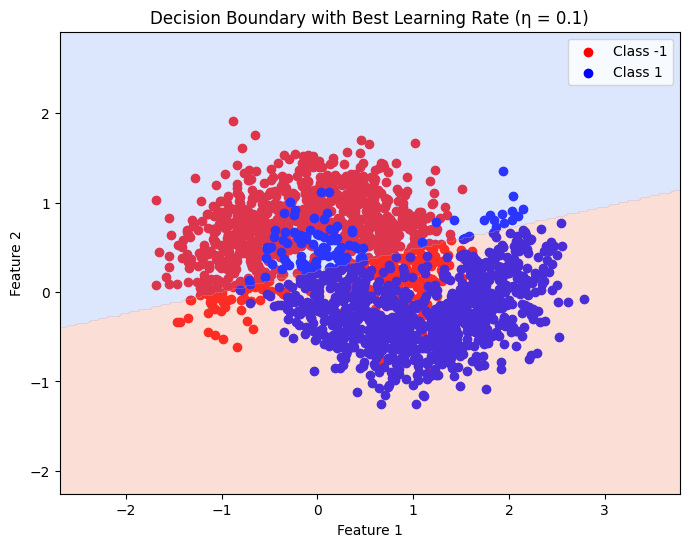

In [3]:

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Optionally, convert labels from [0, 1] to [-1, +1]
y_train = np.where(y_train == 0, -1, 1)
y_test = np.where(y_test == 0, -1, 1)

# Step 3: Train two Perceptron models with different learning rates
perceptron_1 = Perceptron(eta0=0.1, max_iter=1000, tol=1e-3, random_state=42)
perceptron_2 = Perceptron(eta0=1.0, max_iter=1000, tol=1e-3, random_state=42)

perceptron_1.fit(X_train, y_train)
perceptron_2.fit(X_train, y_train)

# Step 4: Predict test data and calculate test errors
y_pred_1 = perceptron_1.predict(X_test)
y_pred_2 = perceptron_2.predict(X_test)

error_1 = 1 - accuracy_score(y_test, y_pred_1)
error_2 = 1 - accuracy_score(y_test, y_pred_2)

print(f"Test Error with learning rate 0.1: {error_1}")
print(f"Test Error with learning rate 1.0: {error_2}")

# Step 5: Choose the best model based on test error
best_model = perceptron_1 if error_1 < error_2 else perceptron_2
best_eta = 0.1 if error_1 < error_2 else 1.0

print(f"Best learning rate: {best_eta}")

# Step 6: Plot the decision boundary and the test data
plt.figure(figsize=(8, 6))
plt.title(f"Decision Boundary with Best Learning Rate (η = {best_eta})")

# Plot the test data
plt.scatter(X_test[y_test == -1][:, 0], X_test[y_test == -1][:, 1], color='red', label="Class -1")
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label="Class 1")

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Predict for each point in the meshgrid
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, levels=[-1, 0, 1], cmap='coolwarm', linestyles=['--', '-', '--'])

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## Q 2.3     3-layer Neural Network

K=5, eta=0.01, Test Error=0.135
K=5, eta=0.001, Test Error=0.08650000000000002
K=10, eta=0.01, Test Error=0.08250000000000002
K=10, eta=0.001, Test Error=0.08450000000000002
K=15, eta=0.01, Test Error=0.08599999999999997
K=15, eta=0.001, Test Error=0.08250000000000002
K=20, eta=0.01, Test Error=0.08299999999999996
K=20, eta=0.001, Test Error=0.08450000000000002
K=25, eta=0.01, Test Error=0.08799999999999997
K=25, eta=0.001, Test Error=0.08550000000000002
K=30, eta=0.01, Test Error=0.09150000000000003
K=30, eta=0.001, Test Error=0.08699999999999997
K=35, eta=0.01, Test Error=0.08699999999999997
K=35, eta=0.001, Test Error=0.08399999999999996
K=40, eta=0.01, Test Error=0.08599999999999997
K=40, eta=0.001, Test Error=0.08499999999999996


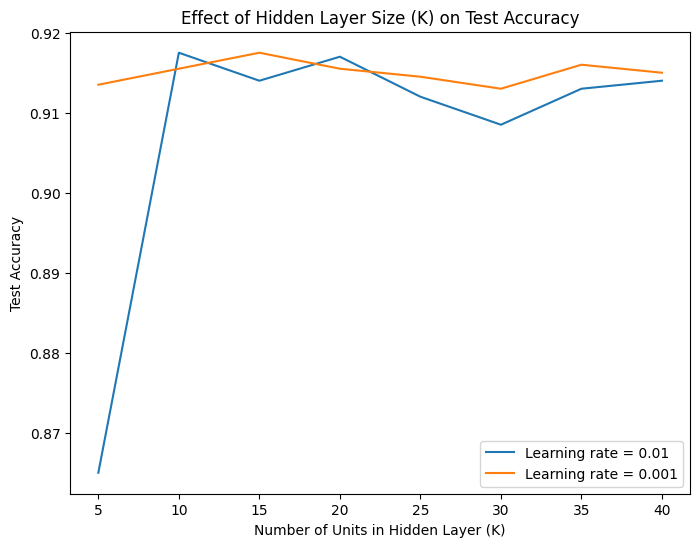

Best K: 10, Best eta: 0.01


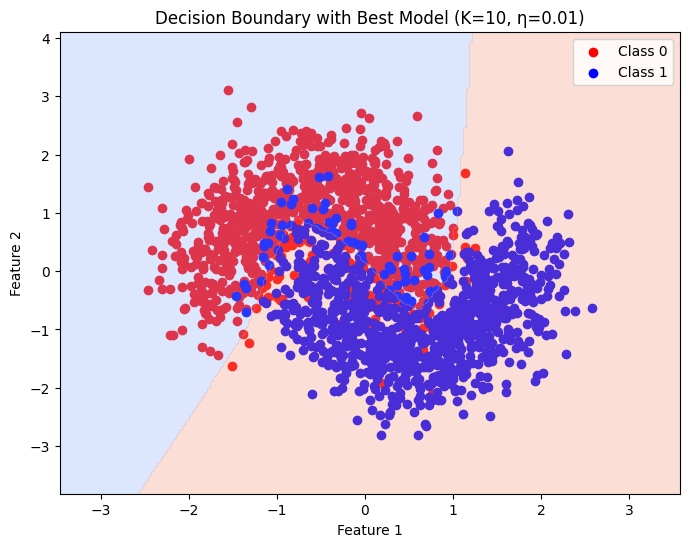

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

y_train = train_data['label'].values
y_test = test_data['label'].values

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range for hidden layer sizes (K) and learning rates (η)
K_values = np.arange(5, 45, 5)
eta_values = [0.01, 0.001]

# Store the test errors for each combination
test_errors = np.zeros((len(K_values), len(eta_values)))

# Step 3: Train the neural network for each combination of K and η
for i, K in enumerate(K_values):
    for j, eta in enumerate(eta_values):
        # Define a 3-layer neural network (K units in each hidden layer)
        model = MLPClassifier(hidden_layer_sizes=(K, K, K), learning_rate_init=eta, max_iter=2000, random_state=42)

        # Train the model
        model.fit(X_train_scaled, y_train)

        # Predict on test data
        y_pred = model.predict(X_test_scaled)

        # Calculate test error
        test_errors[i, j] = 1 - accuracy_score(y_test, y_pred)

        print(f"K={K}, eta={eta}, Test Error={test_errors[i, j]}")

# Step 4: Plot the effect of K on accuracy for each learning rate
plt.figure(figsize=(8, 6))
for j, eta in enumerate(eta_values):
    plt.plot(K_values, 1 - test_errors[:, j], label=f"Learning rate = {eta}")

plt.title("Effect of Hidden Layer Size (K) on Test Accuracy")
plt.xlabel("Number of Units in Hidden Layer (K)")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

# Step 5: Find the best combination of K and η
min_error_idx = np.unravel_index(np.argmin(test_errors, axis=None), test_errors.shape)
best_K = K_values[min_error_idx[0]]
best_eta = eta_values[min_error_idx[1]]

print(f"Best K: {best_K}, Best eta: {best_eta}")

# Step 6: Train the best model and plot the decision boundary
best_model = MLPClassifier(hidden_layer_sizes=(best_K, best_K, best_K), learning_rate_init=best_eta, max_iter=2000, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Plot the decision boundary and the test data
plt.figure(figsize=(8, 6))
plt.title(f"Decision Boundary with Best Model (K={best_K}, η={best_eta})")

# Plot the test data
plt.scatter(X_test_scaled[y_test == 0][:, 0], X_test_scaled[y_test == 0][:, 1], color='red', label="Class 0")
plt.scatter(X_test_scaled[y_test == 1][:, 0], X_test_scaled[y_test == 1][:, 1], color='blue', label="Class 1")

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Predict for each point in the meshgrid
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, levels=[0, 0.5, 1], cmap='coolwarm')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## Q 2.4 Explanation

Perceptron:

A Perceptron is a linear classifier, meaning it can only create linear decision boundaries. It assumes that the data points can be separated by a straight line (a hyperplane in higher dimensions).
If the dataset is linearly separable, the Perceptron can perfectly classify the data points with a straight decision boundary.
The Perceptron has a rigid structure and can only classify data that is linearly separable. It cannot handle non-linear relationships between the features.
Typically uses a simple threshold-based activation function that does not introduce non-linearity into the decision-making process.

3-Layer Neural Network:

A 3-layer neural network has multiple hidden layers, which provide the ability to learn non-linear decision boundaries.
The presence of non-linear activation functions (like ReLU, tanh, or sigmoid) in the hidden layers allows the model to capture more complex patterns in the data, including curved or more intricate decision boundaries. The 3-layer neural network has the flexibility to handle both linear and non-linear separable data. Its hidden layers enable it to learn complex feature interactions and non-linear patterns that the Perceptron cannot.This is why  the accuracy improved in Neural Network as 0.082.
Uses non-linear activation functions (e.g., ReLU, sigmoid, tanh), which allow the layers to transform the input data in a way that a linear separation becomes possible in higher dimensions.

This comparison illustrates the significant advantage of neural networks over simple linear models like the Perceptron in handling non-linear data distributions.